<a href="https://www.kaggle.com/code/tigershiva02/loan-comp?scriptVersionId=205382674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Logistic Regression Accuracy: 0.9122687356125841
Decision Tree Accuracy: 0.9064711399096257
Random Forest Accuracy: 0.9511467303265411
Gradient Boosting Accuracy: 0.9457754284252707
CatBoost Accuracy: 0.9539602694176826
Stacking Classifier Accuracy: 0.953875010657345


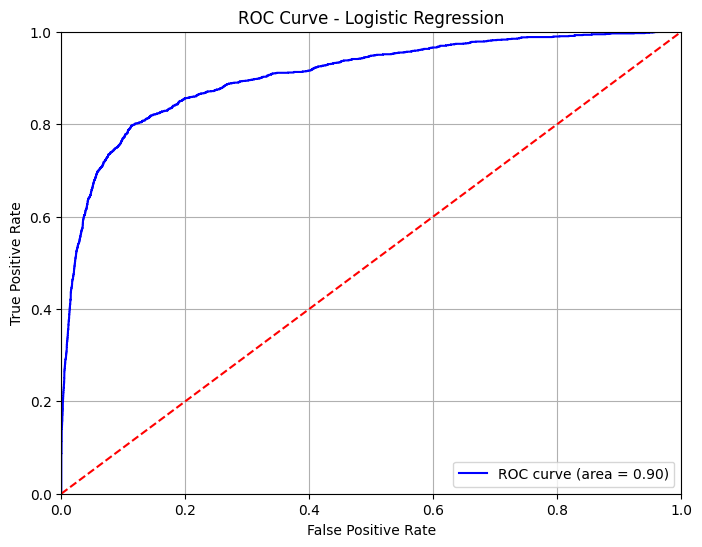

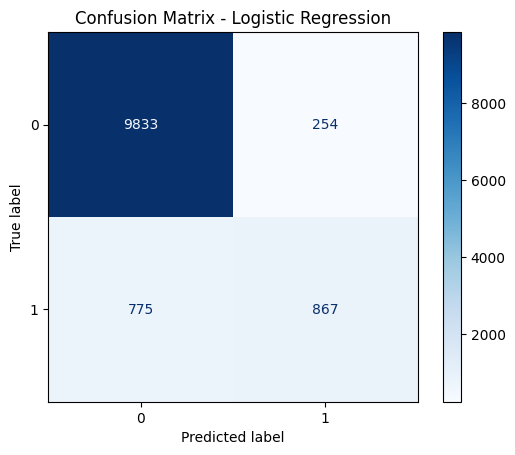

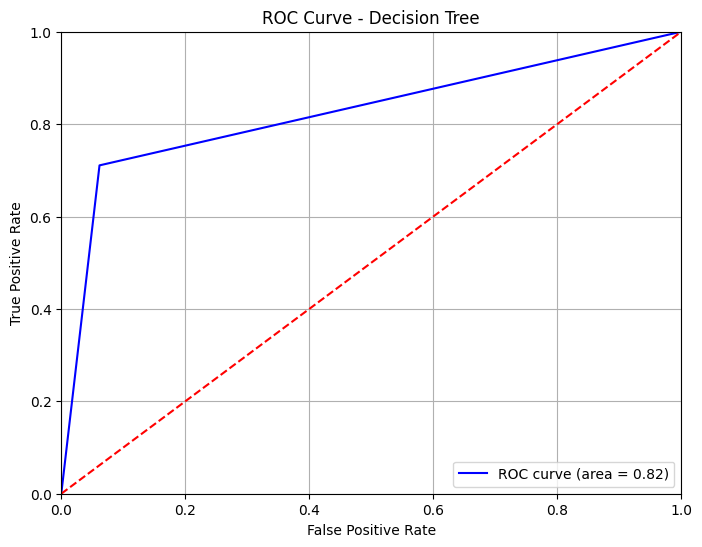

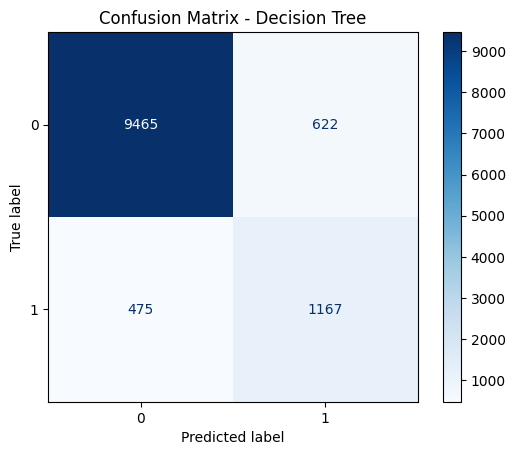

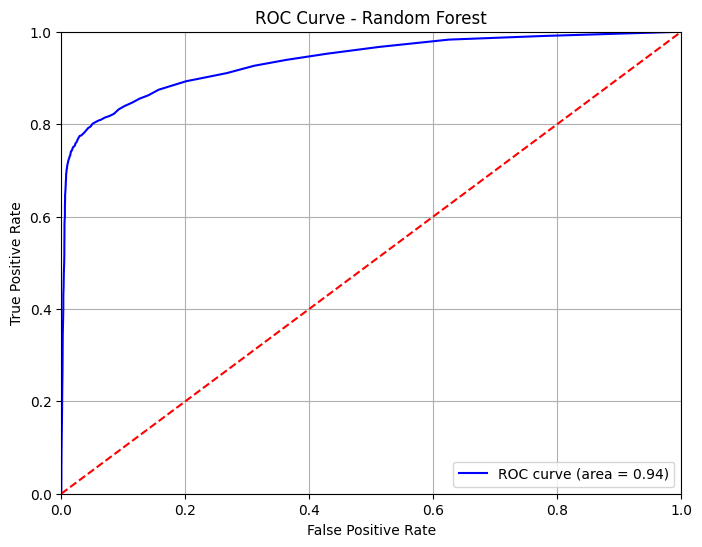

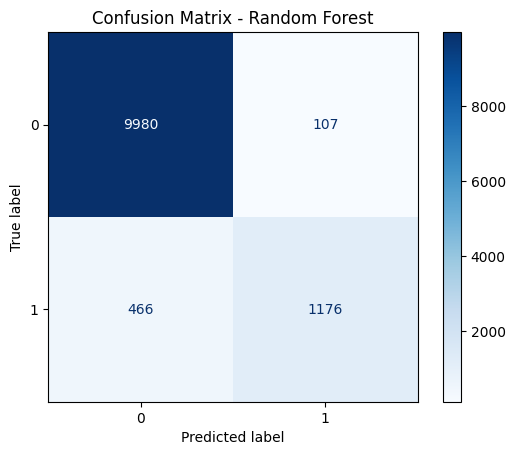

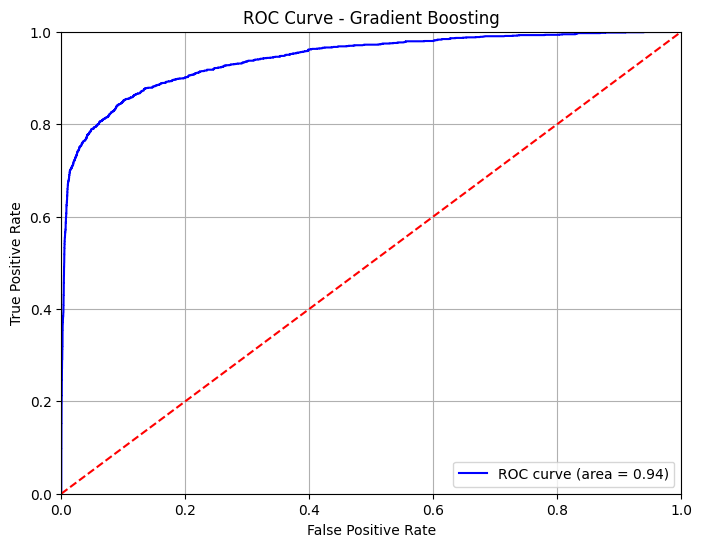

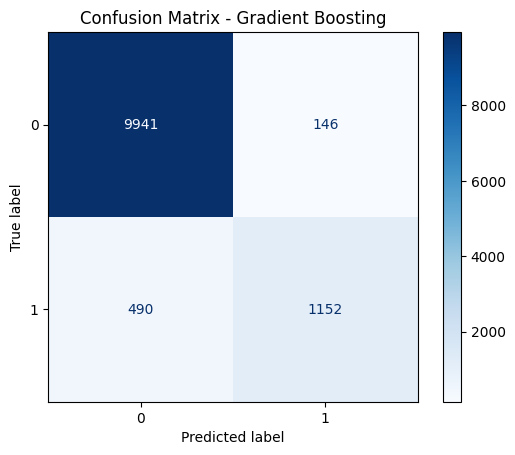

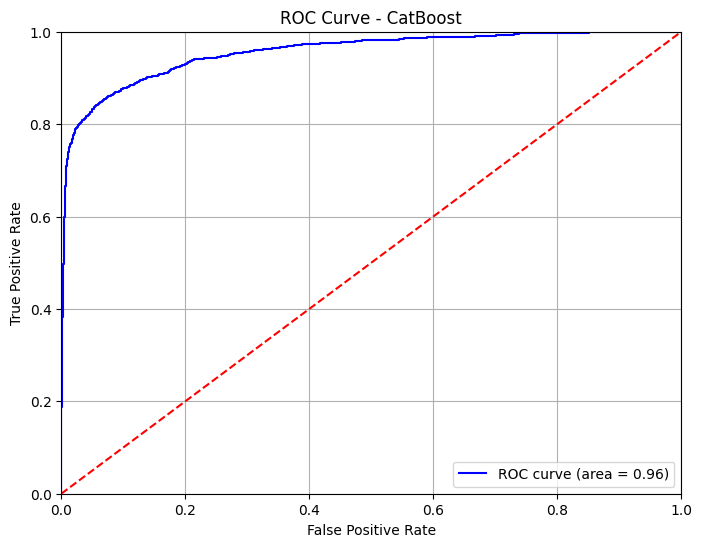

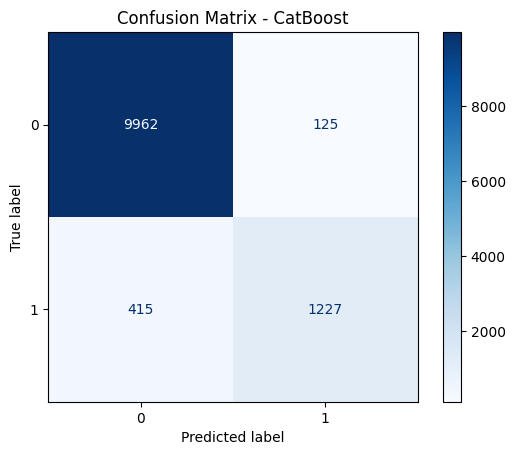

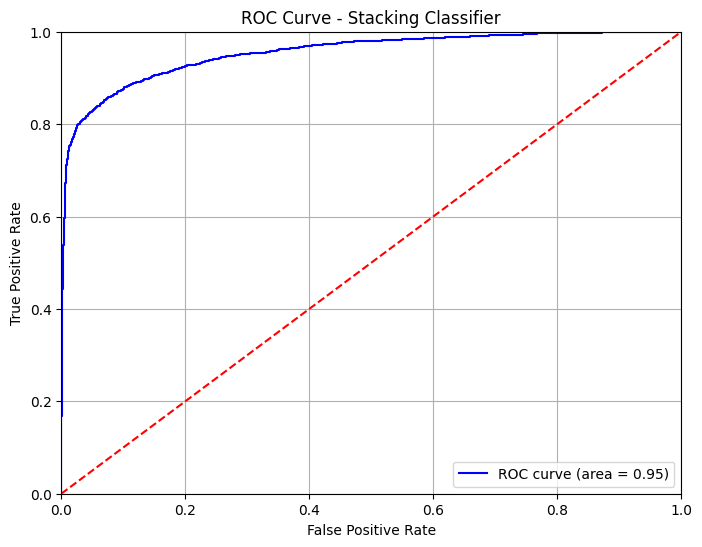

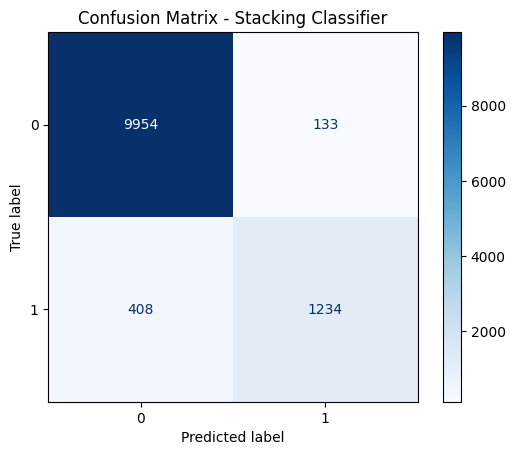

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/kaggle/input/trainandtest/train.csv')
test_data = pd.read_csv("/kaggle/input/trainandtest/test.csv")

# Preprocess the data
X = train_data.drop(['loan_status'], axis=1)
y = train_data['loan_status']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align the columns of test_data with train_data
X, test_data = X.align(test_data, join='left', axis=1, fill_value=0)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (after encoding)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Model training and evaluation
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_val_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_val_scaled)[:, 1]

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_val_scaled)
y_pred_proba_dt = dt.predict_proba(X_val_scaled)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)
y_pred_proba_rf = rf.predict_proba(X_val_scaled)[:, 1]

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_val_scaled)
y_pred_proba_gb = gb.predict_proba(X_val_scaled)[:, 1]

# CatBoost
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_val)
y_pred_proba_cat = catboost.predict_proba(X_val)[:, 1]

# Stacking Classifier
estimators = [
    ('log_reg', log_reg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('catboost', catboost)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stack = stacking_clf.predict(X_val_scaled)
y_pred_proba_stack = stacking_clf.predict_proba(X_val_scaled)[:, 1]


print(f"Logistic Regression Accuracy: {accuracy_score(y_val, y_pred_lr)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_val, y_pred_dt)}")
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf)}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_val, y_pred_gb)}")
print(f"CatBoost Accuracy: {accuracy_score(y_val, y_pred_cat)}")
print(f"Stacking Classifier Accuracy: {accuracy_score(y_val, y_pred_stack)}")


plot_roc_curve(y_val, y_pred_proba_lr, 'Logistic Regression')
plot_confusion_matrix(y_val, y_pred_lr, 'Logistic Regression')

plot_roc_curve(y_val, y_pred_proba_dt, 'Decision Tree')
plot_confusion_matrix(y_val, y_pred_dt, 'Decision Tree')

plot_roc_curve(y_val, y_pred_proba_rf, 'Random Forest')
plot_confusion_matrix(y_val, y_pred_rf, 'Random Forest')

plot_roc_curve(y_val, y_pred_proba_gb, 'Gradient Boosting')
plot_confusion_matrix(y_val, y_pred_gb, 'Gradient Boosting')

plot_roc_curve(y_val, y_pred_proba_cat, 'CatBoost')
plot_confusion_matrix(y_val, y_pred_cat, 'CatBoost')

# Plot ROC Curve and Confusion Matrix for Stacking Classifier
plot_roc_curve(y_val, y_pred_proba_stack, 'Stacking Classifier')
plot_confusion_matrix(y_val, y_pred_stack, 'Stacking Classifier')



In [2]:
# --- SUBMISSION FILE GENERATION ---

# Make predictions on test data using the Stacking Classifier
y_test_pred_proba_stack = stacking_clf.predict_proba(X_test_scaled)[:, 1]

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['id'],  # Assuming 'Id' is the identifier column in test.csv
    'loan_status': y_test_pred_proba_stack  # Predicted probabilities for test set
})

# Save the submission to CSV
submission.to_csv('loan_approval_submission.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!
